<a href="https://colab.research.google.com/github/ibbi-12/Enchanced-web-scraper/blob/main/Enhanced_Web_Scraper_with_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scrape Data Across Multiple Pages**

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Starting URL for the first page in the catalogue
page_url = "http://books.toscrape.com/catalogue/page-1.html"
books_data = []

while True:
    print(f"Scraping: {page_url}")
    response = requests.get(page_url)
    if response.status_code != 200:
        print("Failed to retrieve the page.")
        break

    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all('article', class_='product_pod')

    # Extract book details from each article
    for article in articles:
        title = article.find('h3').find('a')['title']
        price = article.find('p', class_='price_color').text.strip()
        # The rating is the second class (e.g., "Three")
        rating = article.find('p', class_='star-rating')['class'][1]
        availability = article.find('p', class_='instock availability').text.strip()

        books_data.append({
            'title': title,
            'price': price,
            'rating': rating,
            'availability': availability
        })

    # Find the 'next' page link
    next_button = soup.find('li', class_='next')
    if next_button:
        next_link = next_button.find('a')['href']
        page_url = urljoin(page_url, next_link)
    else:
        break

print(f"Total books scraped: {len(books_data)}")


Scraping: http://books.toscrape.com/catalogue/page-1.html
Scraping: http://books.toscrape.com/catalogue/page-2.html
Scraping: http://books.toscrape.com/catalogue/page-3.html
Scraping: http://books.toscrape.com/catalogue/page-4.html
Scraping: http://books.toscrape.com/catalogue/page-5.html
Scraping: http://books.toscrape.com/catalogue/page-6.html
Scraping: http://books.toscrape.com/catalogue/page-7.html
Scraping: http://books.toscrape.com/catalogue/page-8.html
Scraping: http://books.toscrape.com/catalogue/page-9.html
Scraping: http://books.toscrape.com/catalogue/page-10.html
Scraping: http://books.toscrape.com/catalogue/page-11.html
Scraping: http://books.toscrape.com/catalogue/page-12.html
Scraping: http://books.toscrape.com/catalogue/page-13.html
Scraping: http://books.toscrape.com/catalogue/page-14.html
Scraping: http://books.toscrape.com/catalogue/page-15.html
Scraping: http://books.toscrape.com/catalogue/page-16.html
Scraping: http://books.toscrape.com/catalogue/page-17.html
Scrapi

# **Save the Data to a CSV File**

In [ ]:
import pandas as pd

# Create a DataFrame from the scraped data
df = pd.DataFrame(books_data)

# Save the DataFrame to a CSV file
df.to_csv('books_data.csv', index=False)
print("Data saved to books_data.csv")


Data saved to books_data.csv


# **Perform Data Analysis**

Average Book Price: £35.07
Rating Counts:
rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64


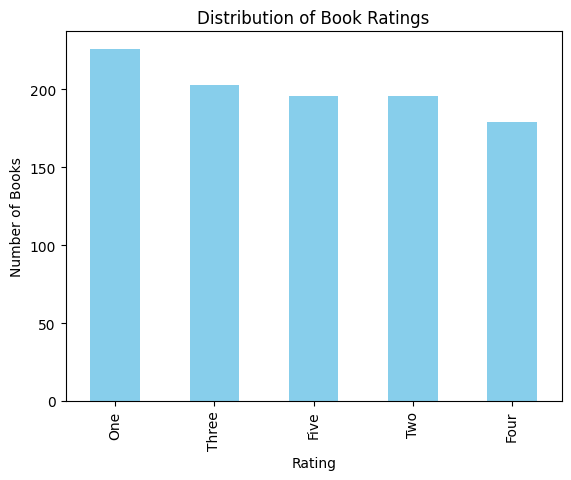

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('books_data.csv')

# Convert price from string (e.g., "£51.77") to float
df['price'] = df['price'].str.replace('Â', '', regex=False) \
                         .str.replace('£', '', regex=False) \
                         .astype(float)


# Calculate average price
average_price = df['price'].mean()
print("Average Book Price: £{:.2f}".format(average_price))

# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()
print("Rating Counts:")
print(rating_counts)

# Plot the distribution of ratings
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()
